###Importing libraries

In [1]:
import numpy as np
import pandas as pd   

###Importing dataset (from google drive)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/DMA project/Project2_Sentiment_Analysis/a2_RestaurantReviews_FreshDump.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


###Data cleaning

In [4]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
corpus=[]

for i in range(0, 100):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

###Data transformation

In [6]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='/content/drive/MyDrive/DMA project/Project2_Sentiment_Analysis/c1_BoW_Sentiment_Model.pkl'
# cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2 Sentiment Analysis (Basic)/3.1 BoW_Sentiment Model.pkl', "rb")))
cv = pickle.load(open(cvFile, "rb"))


In [7]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(100, 1420)

###Predictions (via sentiment classifier)

In [8]:
import joblib
classifier = joblib.load('/content/drive/MyDrive/DMA project/Project2_Sentiment_Analysis/c2_Classifier_Sentiment_Model')

In [9]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


**Conclusion drawn for the data**

In [10]:
positive_reviews = 0;
negative_reviews = 0;
for i in y_pred:
  if i==1:
    positive_reviews=positive_reviews+1;
  else:
    negative_reviews=negative_reviews+1;

if positive_reviews>negative_reviews:
  print("The Restaurant's got the Good FeedBack")
elif positive_reviews<negative_reviews:
  print("The Restaurant got the Negative FeedBack");
else:
  print("The Review is Neutral");


The Restaurant got the Negative FeedBack


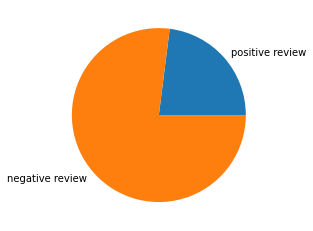

In [17]:
from matplotlib import pyplot as plt
import numpy as np
  
  
# Creating dataset
Expression = ['positive review','negative review']
  
data = [positive_reviews,negative_reviews]
  
# Creating plot
fig = plt.figure(figsize =(4, 4))
plt.pie(data, labels = Expression)
  
# show plot
plt.show()

fig.savefig('my_plot.png')

In [12]:
dataset['predicted_label'] = y_pred.tolist()
dataset.head()

,Review,predicted_label
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",0
4,-My order was not correct.,0


In [13]:
dataset.to_csv("./drive/MyDrive/Project2_Sentiment_Analysis/c3_Predicted_Sentiments_Fresh_Dump.tsv", sep='\t', encoding='UTF-8', index=False)

FileNotFoundError: ignored